In [14]:

import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

%matplotlib inline

In [3]:
def revert_channel(image):
    return image[:,:,::-1]

In [59]:
# // Various color types for detected shirt colors.
# enum                             {cBLACK=0,cWHITE, cGREY, cRED, cORANGE, cYELLOW, cGREEN, cAQUA, cBLUE, cPURPLE, cPINK,  NUM_COLOR_TYPES};
# char* sCTypes[NUM_COLOR_TYPES] = {"Black", "White","Grey","Red","Orange","Yellow","Green","Aqua","Blue","Purple","Pink"};
# uchar cCTHue[NUM_COLOR_TYPES] =    {0,       0,      0,     0,     20,      30,      55,    85,   115,    138,     161};
# uchar cCTSat[NUM_COLOR_TYPES] =    {0,       0,      0,    255,   255,     255,     255,   255,   255,    255,     255};
# uchar cCTVal[NUM_COLOR_TYPES] =    {0,      255,    120,   255,   255,     255,     255,   255,   255,    255,     255};

class COLOR_TYPES(Enum):
    black = 0
    white = 1
    grey = 2
    red = 3
    orange = 4
    yellow = 5
    green = 6
    aqua = 7
    blue = 8
    purple = 9
    pink = 10

colors = ["Black", "White","Grey","Red","Orange","Yellow","Green","Aqua","Blue","Purple","Pink"]
c_hue =    [0,       0,      0,     0,     20,      30,      55,    85,   115,    138,     161]
c_sat =    [0,       0,      0,    255,   255,     255,     255,   255,   255,    255,     255]
c_val =    [0,      255,    120,   255,   255,     255,     255,   255,   255,    255,     255]

# int getPixelColorType(int H, int S, int V)
# {
# 	int color;
# 	if (V < 75)
# 		color = cBLACK;
# 	else if (V > 190 && S < 27)
# 		color = cWHITE;
# 	else if (S < 53 && V < 185)
# 		color = cGREY;
# 	else {	// Is a color
# 		if (H < 14)
# 			color = cRED;
# 		else if (H < 25)
# 			color = cORANGE;
# 		else if (H < 34)
# 			color = cYELLOW;
# 		else if (H < 73)
# 			color = cGREEN;
# 		else if (H < 102)
# 			color = cAQUA;
# 		else if (H < 127)
# 			color = cBLUE;
# 		else if (H < 149)
# 			color = cPURPLE;
# 		else if (H < 175)
# 			color = cPINK;
# 		else	// full circle 
# 			color = cRED;	// back to Red
# 	}
# 	return color;
# }

def get_pixel_color_type(h, s, v):
    color = 0

    if v < 75:
        color = COLOR_TYPES.black
    elif v > 190 and s < 27:
        color = COLOR_TYPES.white
    elif s < 53 and v < 185:
        color = COLOR_TYPES.grey
    else:
        if h < 14:
            color = COLOR_TYPES.red
        elif h < 25:
            color = COLOR_TYPES.orange
        elif h < 34:
            color = COLOR_TYPES.yellow
        elif h < 73:
            color = COLOR_TYPES.green
        elif h < 102:
            color = COLOR_TYPES.aqua
        elif h < 127:
            color = COLOR_TYPES.blue
        elif h < 149:
            color = COLOR_TYPES.purple
        elif h < 175:
            color = COLOR_TYPES.pink
        else:
            color = COLOR_TYPES.red
            
    return color
        


In [91]:
def calc_color_in_rect(rect, image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    xmin, ymin, xmax, ymax = rect
    plt.imshow(hsv)
    colors = [0] * len(COLOR_TYPES)
    crop_image = image[ymin: ymax, xmin: xmax]
#     plt.imshow(revert_channel(crop_image))

    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            h = hsv[i, j, 0]
            s = hsv[i, j, 1]
            v = hsv[i, j, 2]
            print(h,s,v)
            
            color_type = get_pixel_color_type(h, s, v)
            colors[color_type.value] += 1
            
    print(colors)
    

(570, 352, 3)
(176, 240, 216, 280)


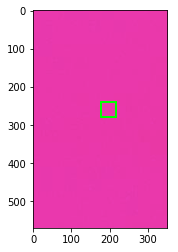

In [93]:
image = cv2.imread('pink.png')
print(image.shape)
i_h, i_w = image.shape[:2]
rect = (i_w//2, i_h//3 + 50, i_w//2+40, i_h//3+90) #(xmin, ymin, xmax, ymax)
print(rect)
xmin, ymin, xmax, ymax = rect
copy_image = image.copy()
cv2.rectangle(copy_image,(xmin,ymin),(xmax,ymax),(0,255,0),3)
plt.imshow(revert_channel(copy_image))

161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 234
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 233
161 194 234
161 194 234
161 194 234
161 

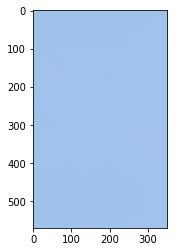

In [94]:
calc_color_in_rect(rect, image)